In [31]:
import os
os.environ["KAGGLE_USERNAME"]="gyeongsugim"
os.environ["KAGGLE_KEY"]="13ef87a9410279c26d00c6ec2999b870"

In [32]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from sklearn.model_selection import train_test_split

# What is a classfication problems?

데이터를 n개의 클래스 중 하나로 분류하는 것으로,  데이터는 n개의 클래스가 가지는 각 특성의 유사성을 기준으로 분류한다.

* Binary Classification
* Multiclass Classification (=Categorical Classification) - One class takes only one label
* Multilabels Classification 

**Again! What is a regression problems?**

* Regression - 독립 변수(feature)가 종속 변수(label)에 미치는 영향, 독립 변수와 종속 변수 간의 관계를 분석하는 통계 기법이다.
* Linear Regression - 독립 변수와 종속 변수 간의 관계가 선형으로
*  나타나는 Regression이다.
* Logistic Regression - Linear Regression과 다르게, 종속 변수가 범주를 가지며, 입력 데이터가 특정 기준에 따라 분류되므로 classification으로 간주되기도 한다.

# How does input data look like in classification problem?

example_shape = [batch_size, width, height, colour_channels]
shape1 = [None, 224, 224, 3]
shape2 = [32, 28, 28, 3]

32 is very comman(default) batch size

### The shape of output tensor is same with the number of classes

# (Typical) Architecture of Classification Model

* Input layer shape
* Hidden layer(s) - Problem specific
* Hidden activation - Usually ReLU
* Neurons per hidden layer - Generally 10 to 100
* Output layer shape
* Output activation - Usually Softmax
* Loss function - (Binary or Categorical) Cross Entrophy
* Optimizer - **Adam** or SGD

###### Why Adam?
&ensp; Adam is safe.

In [33]:
from sklearn.datasets import make_circles

In [70]:
n = 1000

x, y = make_circles(n, noise=0.03, random_state=42)

In [35]:
x[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [36]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

### Visualize

In [37]:
circles = pd.DataFrame({"x0":x[:,0], "x1":x[:,1], "label":y})
circles.head()

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [38]:
x.shape, y.shape, len(x), len(y)

((1000, 2), (1000,), 1000, 1000)

In [39]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

### Visualize with Plot

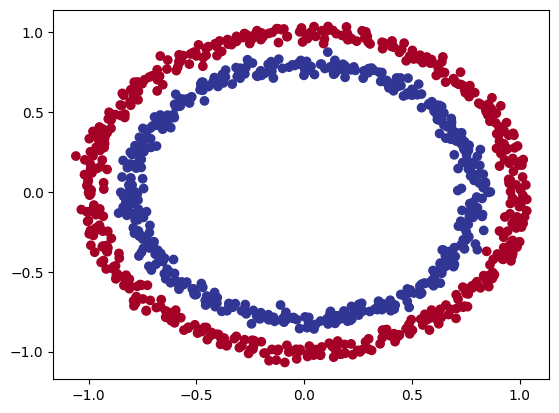

In [40]:
plt.scatter(x[:,0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

### Input and output Shapes

In [41]:
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Modeling

In [43]:
tf.random.set_seed(42)

model_1 = Sequential()
model_1.add(Dense(1, activation="sigmoid"))

model_1.compile(loss=binary_crossentropy, optimizer=Adam(learning_rate=0.01), metrics=["acc"])

model_1.fit(x_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7660 - acc: 0.5088
Epoch 2/100
25/25 [==============================] - 0s 931us/step - loss: 0.7362 - acc: 0.5100
Epoch 3/100
25/25 [==============================] - 0s 857us/step - loss: 0.7175 - acc: 0.5138
Epoch 4/100
25/25 [==============================] - 0s 825us/step - loss: 0.7067 - acc: 0.5113
Epoch 5/100
25/25 [==============================] - 0s 800us/step - loss: 0.6998 - acc: 0.5088
Epoch 6/100
25/25 [==============================] - 0s 735us/step - loss: 0.6966 - acc: 0.5063
Epoch 7/100
25/25 [==============================] - 0s 729us/step - loss: 0.6945 - acc: 0.5125
Epoch 8/100
25/25 [==============================] - 0s 997us/step - loss: 0.6939 - acc: 0.5125
Epoch 9/100
25/25 [==============================] - 0s 829us/step - loss: 0.6939 - acc: 0.5025
Epoch 10/100
25/25 [==============================] - 0s 732us/step - loss: 0.6938 - acc: 0.5025
Epoch 11/100
25/25 [=====================

In [44]:
model_1.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.6944 - acc: 0.4900


[0.6944352984428406, 0.49000000953674316]

### Function for Visualizing

* Take in a trained model, features(x) and labels(y)
* Create a meshgrid of the different x values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones

In [45]:
def plot_decision_boundary(model, x, y):
    """
    Plots the decision boundary created by a model predicting on x.
    From
    1. Made with ML (https://madewithml.com/)
    2. https://cs321n.github.io/neural-networks-case-study/
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = x[:, 0].min() - 0.0, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 0].min() - 0.0, x[:, 0].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Create x values on which we're going to make predictions 
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40,  cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    

313/313 [==============================] - 0s 485us/step
Doing binary classification


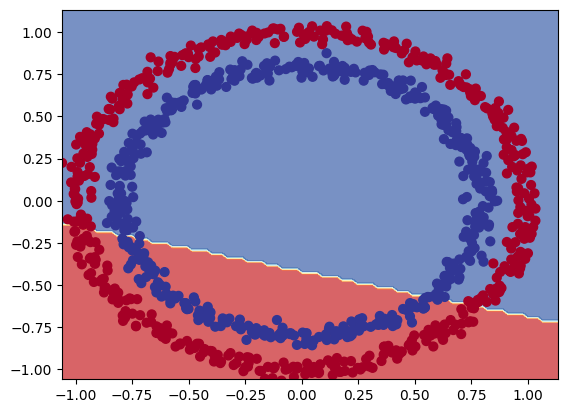

In [46]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_1, x=x, y=y)

In [69]:
# More hidden layer
tf.random.set_seed(42)

model_2 = Sequential()
model_2.add(Dense(4, activation="relu"))
model_2.add(Dense(4, activation="relu"))
model_2.add(Dense(1))

model_2.compile(loss=binary_crossentropy, optimizer=Adam(), metrics=["acc"])

history = model_2.fit(x_train, y_train, epochs=500)

Epoch 1/500
75/75 [==============================] - 0s 1ms/step - loss: 1.0349 - acc: 0.4471
Epoch 2/500
75/75 [==============================] - 0s 884us/step - loss: 0.8918 - acc: 0.4383
Epoch 3/500
75/75 [==============================] - 0s 789us/step - loss: 0.8280 - acc: 0.4296
Epoch 4/500
75/75 [==============================] - 0s 776us/step - loss: 0.7925 - acc: 0.4183
Epoch 5/500
75/75 [==============================] - 0s 791us/step - loss: 0.7715 - acc: 0.4258
Epoch 6/500
75/75 [==============================] - 0s 778us/step - loss: 0.7554 - acc: 0.4271
Epoch 7/500
75/75 [==============================] - 0s 798us/step - loss: 0.7426 - acc: 0.4354
Epoch 8/500
75/75 [==============================] - 0s 819us/step - loss: 0.7308 - acc: 0.4363
Epoch 9/500
75/75 [==============================] - 0s 868us/step - loss: 0.7219 - acc: 0.4408
Epoch 10/500
75/75 [==============================] - 0s 774us/step - loss: 0.7148 - acc: 0.4721
Epoch 11/500
75/75 [=====================

In [48]:
model_2.evaluate(x_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 7.7125 - acc: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 0s 604us/step
Doing binary classification


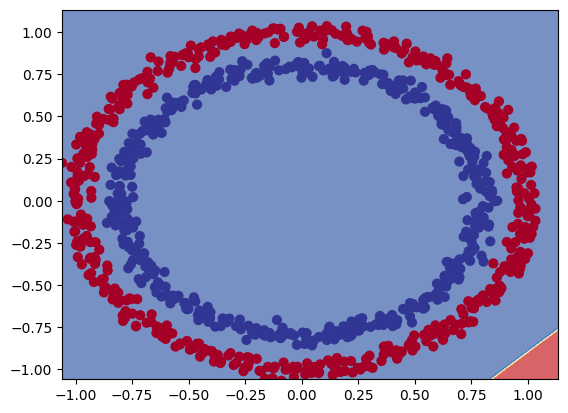

In [49]:
plot_decision_boundary(model_2, x,y)

In [50]:
# Another activation for output layer
tf.random.set_seed(42)

model_3 = Sequential()
model_3.add(Dense(4, activation="relu"))
model_3.add(Dense(4, activation="relu"))
model_3.add(Dense(1, activation="sigmoid"))

model_3.compile(loss=binary_crossentropy, optimizer=Adam(), metrics=["acc"])

history = model_3.fit(x_train, y_train, epochs=250)

Epoch 1/250
25/25 [==============================] - 0s 1ms/step - loss: 0.7084 - acc: 0.5000
Epoch 2/250
25/25 [==============================] - 0s 1ms/step - loss: 0.7054 - acc: 0.4787
Epoch 3/250
25/25 [==============================] - 0s 1ms/step - loss: 0.7027 - acc: 0.4750
Epoch 4/250
25/25 [==============================] - 0s 1ms/step - loss: 0.7010 - acc: 0.4775
Epoch 5/250
25/25 [==============================] - 0s 825us/step - loss: 0.6997 - acc: 0.4825
Epoch 6/250
25/25 [==============================] - 0s 898us/step - loss: 0.6983 - acc: 0.4825
Epoch 7/250
25/25 [==============================] - 0s 831us/step - loss: 0.6972 - acc: 0.4712
Epoch 8/250
25/25 [==============================] - 0s 801us/step - loss: 0.6962 - acc: 0.4412
Epoch 9/250
25/25 [==============================] - 0s 865us/step - loss: 0.6954 - acc: 0.4263
Epoch 10/250
25/25 [==============================] - 0s 857us/step - loss: 0.6945 - acc: 0.4425
Epoch 11/250
25/25 [===========================

In [51]:
model_3.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0964 - acc: 0.9900


[0.09638132154941559, 0.9900000095367432]

313/313 [==============================] - 0s 593us/step
Doing binary classification


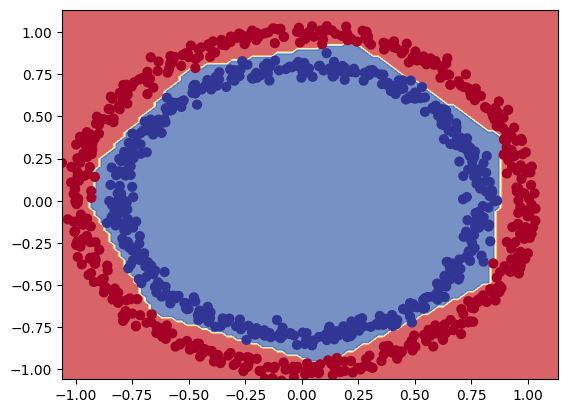

In [52]:
plot_decision_boundary(model_3, x, y)

# 비선형 문제에는 선형 패턴을 구하여 문제를 해결하는 접근 방식이 제한된다.

### Sigmoid

`1 / 1 + e^(-x)`

### ReLU

`max(0, x)`



🔑 **위의 모델들은 어떤 데이터를 학습하고 있고, 무엇을 예측하고 있으며, 무엇을 평가하고 있는가?**

데이터 세트를 분류하는 것은 일반화를 위해서이다. 학습을 바탕으로 새로운 시나리오에도 적응할 수 있도록 하기 위함이다.

In [54]:
x[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [90]:
n = 3000
x, y = make_circles(n, noise=0.03, random_state=42)

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [104]:
tf.random.set_seed(42)

model_4 = Sequential()
model_4.add(Dense(4, activation="relu"))
model_4.add(Dense(4, activation="relu"))
model_4.add(Dense(1, activation="sigmoid"))

model_4.compile(loss=binary_crossentropy, # 모델이 얼마나 오차를 내고 있는지
                optimizer=Adam(), # 모델이 스스로를 어떻게 개선해야 하는지
                metrics=["acc"])

history = model_4.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=250)

Epoch 1/250
75/75 [==============================] - 0s 3ms/step - loss: 0.6913 - acc: 0.5025 - val_loss: 0.6849 - val_acc: 0.5267
Epoch 2/250
75/75 [==============================] - 0s 1ms/step - loss: 0.6895 - acc: 0.5121 - val_loss: 0.6860 - val_acc: 0.5317
Epoch 3/250
75/75 [==============================] - 0s 1ms/step - loss: 0.6886 - acc: 0.5217 - val_loss: 0.6853 - val_acc: 0.5350
Epoch 4/250
75/75 [==============================] - 0s 1ms/step - loss: 0.6877 - acc: 0.5283 - val_loss: 0.6852 - val_acc: 0.5450
Epoch 5/250
75/75 [==============================] - 0s 1ms/step - loss: 0.6861 - acc: 0.5296 - val_loss: 0.6831 - val_acc: 0.5433
Epoch 6/250
75/75 [==============================] - 0s 1ms/step - loss: 0.6849 - acc: 0.5325 - val_loss: 0.6812 - val_acc: 0.5450
Epoch 7/250
75/75 [==============================] - 0s 1ms/step - loss: 0.6823 - acc: 0.5579 - val_loss: 0.6783 - val_acc: 0.5833
Epoch 8/250
75/75 [==============================] - 0s 1ms/step - loss: 0.6796 - a

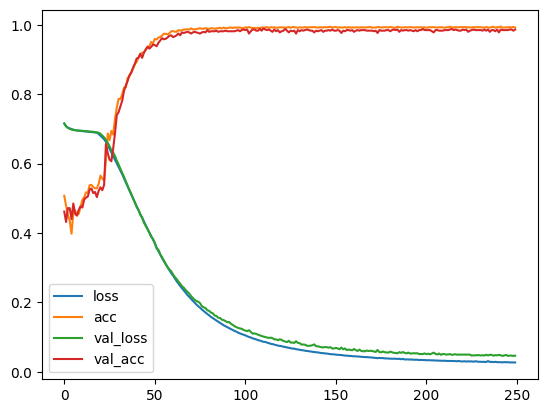

<Figure size 1600x1000 with 0 Axes>

In [93]:
pd.DataFrame(history.history).plot()
plt.figure(figsize=(16,10))
plt.show()

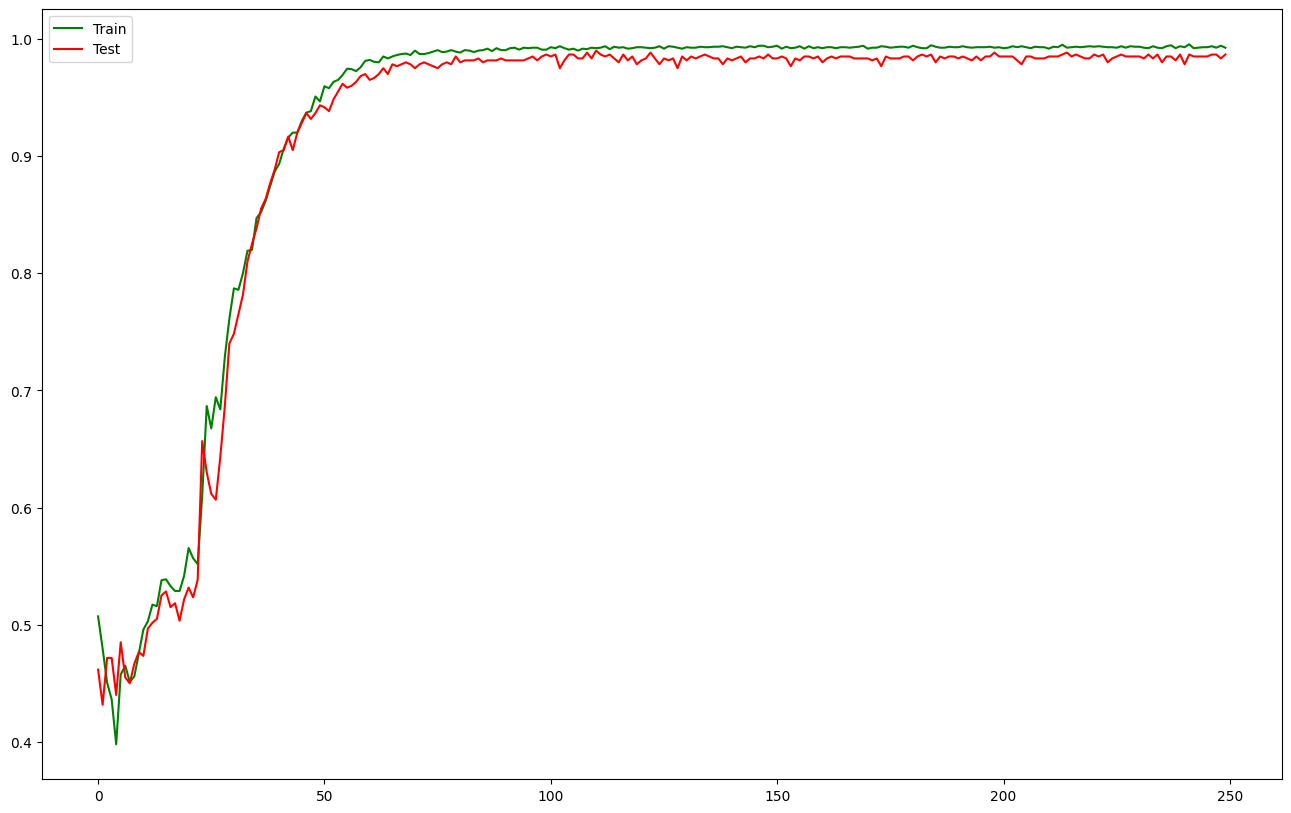

In [94]:
# History data returns loss and metrics values including validation loss and metrics valaues
plt.figure(figsize=(16,10))
plt.plot(history.history["acc"], c="g", label="Train")
plt.plot(history.history["val_acc"], c="r", label="Test")
plt.legend()

313/313 [==============================] - 0s 576us/step
Doing binary classification
313/313 [==============================] - 0s 573us/step
Doing binary classification


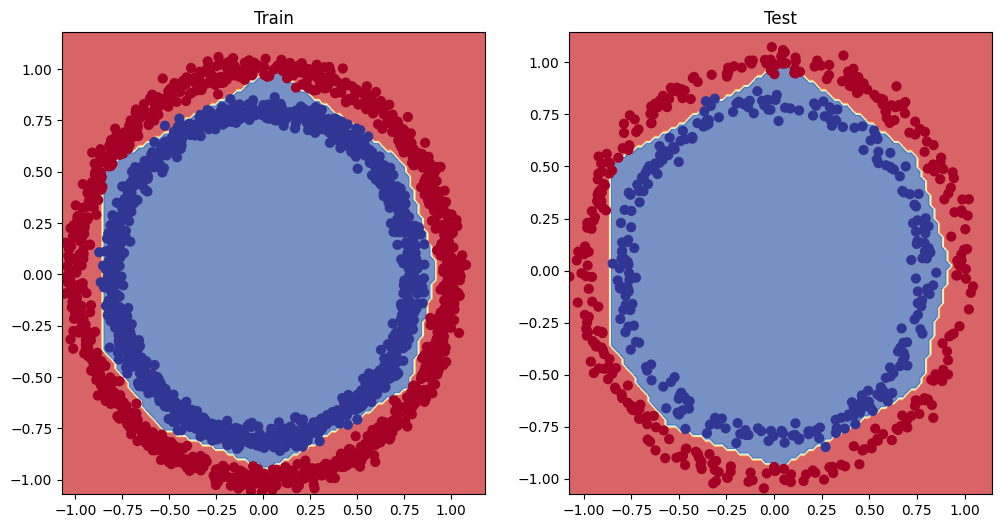

In [95]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, x=x_test, y=y_test)
plt.show()

# Finding the best learning rate

To find the ideal learning rate... (that minimize the loss)

* Adding a learning rate callback - `lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))`
* Another model
* A modified loss curved plot

In [98]:
tf.random.set_seed(42)

model_5 = Sequential()
model_5.add(Dense(4, activation="relu"))
model_5.add(Dense(4, activation="relu"))
model_5.add(Dense(1, activation="sigmoid"))

model_5.compile(loss=binary_crossentropy, # 모델이 얼마나 오차를 내고 있는지
                optimizer=Adam(), # 모델이 스스로를 어떻게 개선해야 하는지
                metrics=["acc"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))

history = model_4.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
75/75 [==============================] - 0s 2ms/step - loss: 0.0209 - acc: 0.9946 - val_loss: 0.0421 - val_acc: 0.9850 - lr: 1.0000e-04
Epoch 2/100
75/75 [==============================] - 0s 1ms/step - loss: 0.0207 - acc: 0.9937 - val_loss: 0.0417 - val_acc: 0.9867 - lr: 1.1220e-04
Epoch 3/100
75/75 [==============================] - 0s 1ms/step - loss: 0.0206 - acc: 0.9942 - val_loss: 0.0416 - val_acc: 0.9867 - lr: 1.2589e-04
Epoch 4/100
75/75 [==============================] - 0s 1ms/step - loss: 0.0208 - acc: 0.9937 - val_loss: 0.0417 - val_acc: 0.9867 - lr: 1.4125e-04
Epoch 5/100
75/75 [==============================] - 0s 1ms/step - loss: 0.0206 - acc: 0.9937 - val_loss: 0.0415 - val_acc: 0.9867 - lr: 1.5849e-04
Epoch 6/100
75/75 [==============================] - 0s 1ms/step - loss: 0.0206 - acc: 0.9933 - val_loss: 0.0409 - val_acc: 0.9867 - lr: 1.7783e-04
Epoch 7/100
75/75 [==============================] - 0s 1ms/step - loss: 0.0206 - acc: 0.9937 - val_loss: 0.0413

Text(0.5, 1.0, 'Learning rate vs Loss')

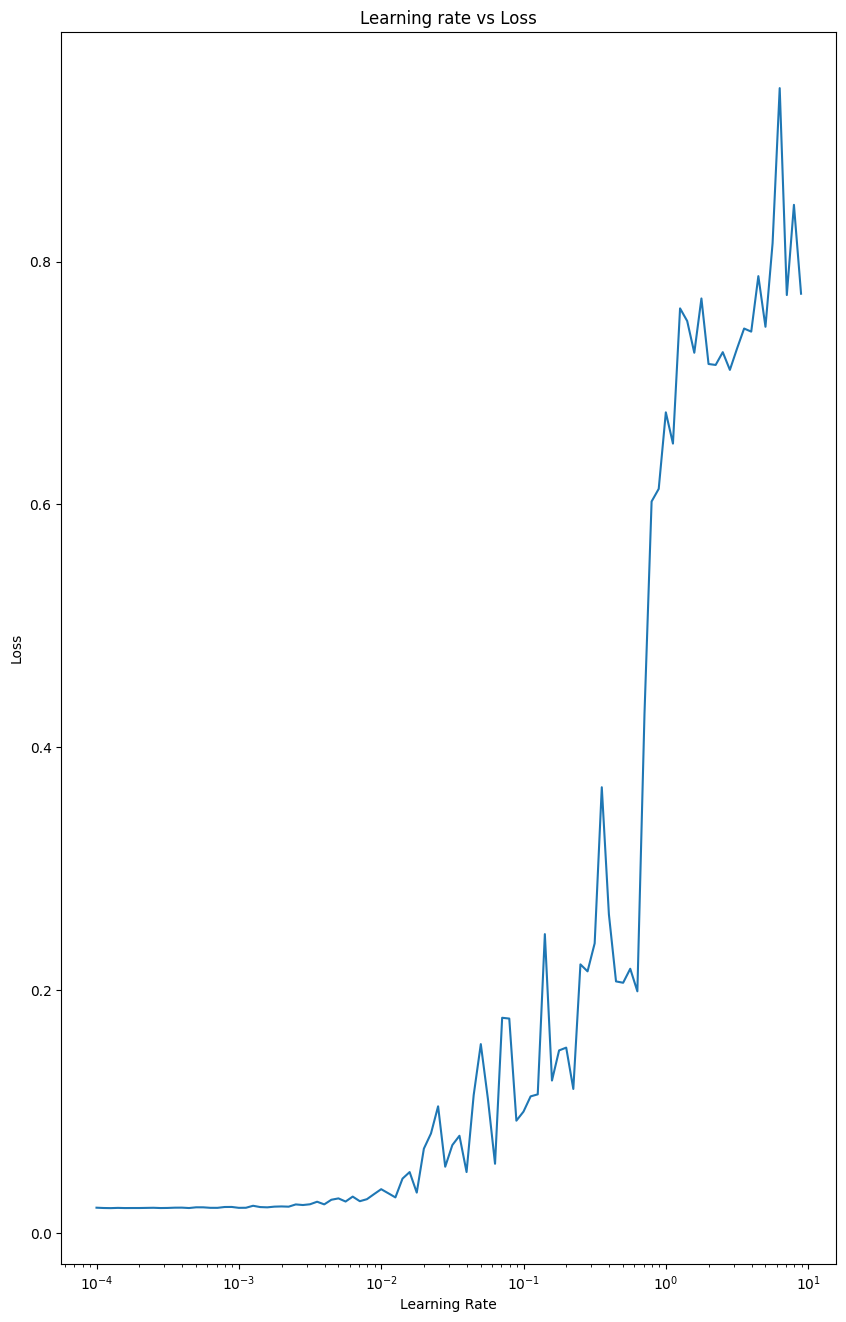

In [100]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (np.arange(100) / 20))
plt.figure(figsize=(10,16))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

# Classification Evalutaion Methods

* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrix  

**Precision / Recall Tradeoff**

Precision과 Recall을 동시에 높일 수 없다. Precision이 높아지면 Recall이 낮아지고, 그 반대도 마찬가지다.

In [105]:
# Check the acc of out model
loss, acc = model_4.evaluate(x_test, y_test)
print(f"Loss: {loss}")
print(f"Acc: {(acc*100):.2f}%")

19/19 [==============================] - 0s 762us/step - loss: 0.0397 - acc: 0.9933
Loss: 0.039709463715553284
Acc: 99.33%


### Confusion Matrix

In [109]:
# Import  confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_4.predict(x_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

19/19 [==============================] - 0s 820us/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [107]:
y_test[:5], y_preds[:5]

(array([1, 1, 1, 0, 0]),
 array([[0.99678296],
        [0.9947192 ],
        [0.993037  ],
        [0.01371616],
        [0.01239726]], dtype=float32))

### y_preds has come out in **prediction probability** form, the standard output from the sigmoid ( or softmax) activation

In [111]:
# Convert y_preds to binary format
tf.round(y_preds)[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)>

In [112]:
# Create confusion matrix
y_preds_rounded = tf.round(y_preds)
confusion_matrix(y_test, y_preds_rounded)

array([[326,   2],
       [  2, 270]])

[[TP, FP],

 [FN, TN]]

### Prettify our confusion matrix

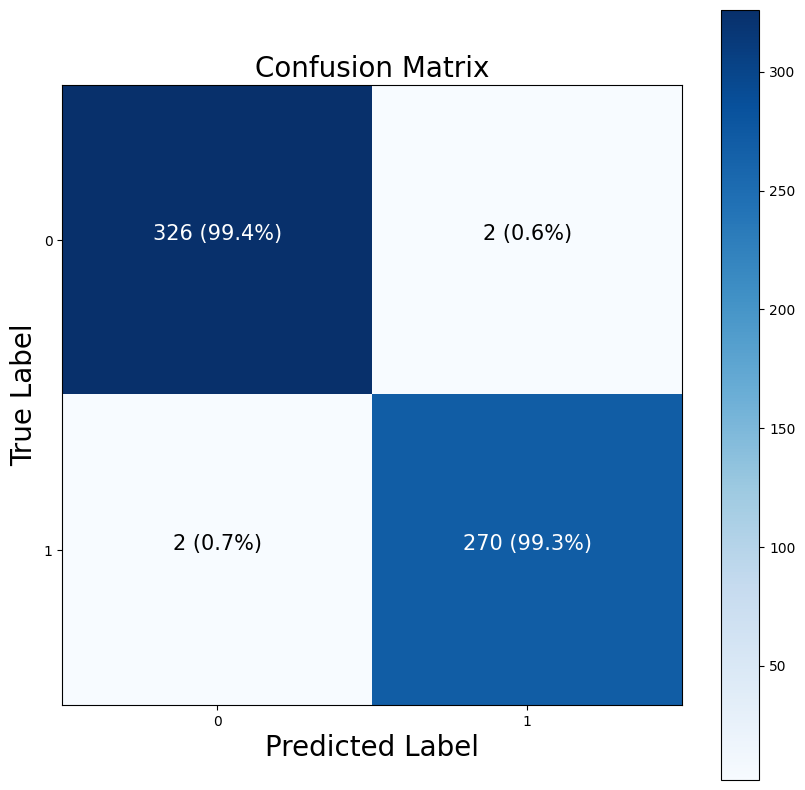

In [117]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_preds_rounded)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Prettify
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])
    
# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each celll
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=15)

# Working with multiclass classification

클래스가 세 개 이상일 때, 이를 Multiclass Classification이라고 한다.

In [119]:
from tensorflow.keras.datasets import fashion_mnist

# 데이터 세트가 분류되어 있음
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [121]:
# Show the first training example
print(f"Training data:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training data:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1

In [123]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

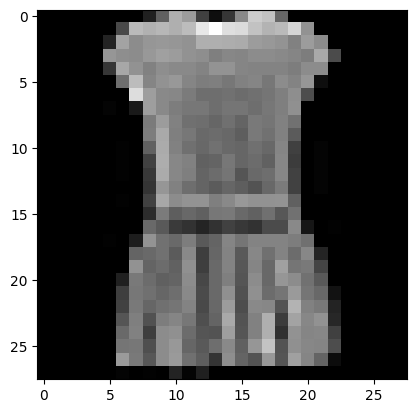

In [132]:
# Plot a single sample
plt.imshow(train_data[3], cmap="gray")

In [131]:
train_labels[3]

3

In [134]:
# Create a small list so we can index onto our training labels so to be human-readable
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker","Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Shirt')

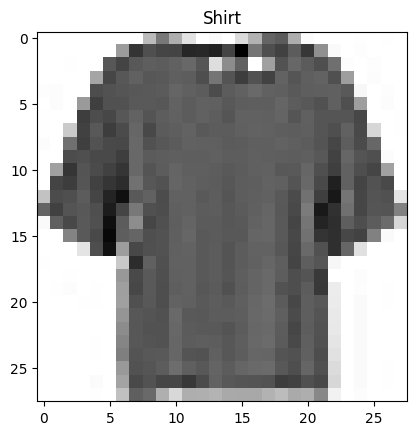

In [136]:
# Plot an example image and its label
index = 77
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

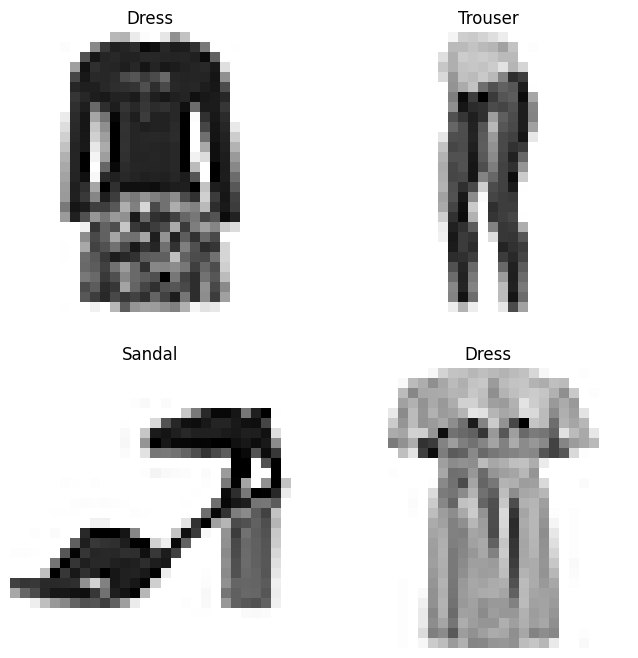

In [140]:
import random
plt.figure(figsize=(8,8))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [145]:
from tensorflow.keras.layers import Flatten

tf.random.set_seed(42)

model_6 = Sequential()
model_6.add(Flatten(input_shape=(28,28)))
model_6.add(Dense(4, activation="relu"))
model_6.add(Dense(4, activation="relu"))
model_6.add(Dense(10, activation="softmax"))

# For one-hot encoded labels, use CategoricalCrossentropy
# For integer labels, use SparseCategoricalCrossentropy

model_6.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["acc"])

not_norm_history = model_6.fit(train_data, tf.one_hot(train_labels, depth=10), validation_data=(test_data, tf.one_hot(test_labels, depth=10)), epochs=40)

Epoch 1/40
1875/1875 [==============================] - 2s 1ms/step - loss: 2.5241 - acc: 0.1399 - val_loss: 1.9971 - val_acc: 0.2061
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.8093 - acc: 0.2331 - val_loss: 1.7352 - val_acc: 0.2646
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7040 - acc: 0.2711 - val_loss: 1.6834 - val_acc: 0.2827
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6317 - acc: 0.3049 - val_loss: 1.5772 - val_acc: 0.3162
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5662 - acc: 0.3196 - val_loss: 1.5603 - val_acc: 0.3341
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5432 - acc: 0.3219 - val_loss: 1.5321 - val_acc: 0.3352
Epoch 7/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5314 - acc: 0.3205 - val_loss: 1.5331 - val_acc: 0.3298
Epoch 8/40
1875/1875 [==============================] - 2s 1ms

In [146]:
scaled_train_data, scaled_test_data = train_data / 255., test_data / 255.

In [ ]:
tf.random.set_seed(42)

model_7 = Sequential()
model_7.add(Flatten(input_shape=(28,28)))
model_7.add(Dense(4, activation="relu"))
model_7.add(Dense(4, activation="relu"))
model_7.add(Dense(10, activation="softmax"))

model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=Adam(), metrics=["acc"])

norm_history = model_7.fit(scaled_train_data, train_labels, validation_data=(scaled_test_data, test_labels), epochs=25)

🔑 **Note**: NN prefer scaled data.